# Projeto 3 - Modelos de Ricker e Beverton-Holt

João Victor Dell Agli Floriano, 10799783

In [58]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Encontre os pontos fixos dos modelos de Ricker e Beverton-Holt (faça K=1) e determine as condições de estabilidade local. 

Para encontrar os pontos fixos desses modelos, devemos, dadas condições iniciais, analisar a variação do valor (a derivada) da população dado ao longo da evolução do modelo, procurando por um valor de variação próximo ou igual a zero, a depender da precisão usada, o que indicaria estagnação.

### Ricker

O modelo de Ricker, introduzido em 1954, descreve a evolução de uma população $P$ ao longo do tempo como:

$$P_{t+1} = P_t e^{r(1 - \frac{P_t}{K})}$$


In [59]:
def ricker(P_t, r, K):    
    return P_t*np.exp(r*(1 - P_t/K))

Usando como condições iniciais $P_0 = 0.01$, $r = 0.09$, $K = 1$ e um tempo total de $T = 500$:

In [60]:
P_0 = 0.01
r = 0.09
K = 1
T = 500

Ps = np.zeros(T)
Ps[0] = P_0

Ts = np.arange(0, T, 1)

Consegue-se evoluir o modelo e verificar seu comportamento.

In [61]:
for t in range(T - 1):
    Ps[t + 1] = ricker(Ps[t], r, K)


Que mostra, para esse $r$, uma grande evolução ao longo dos primeiros 100 anos, chegando a um valor limite.

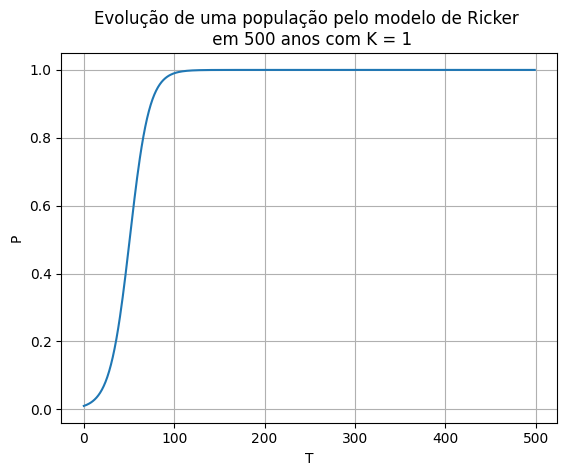

In [62]:
plt.title(f"Evolução de uma população pelo modelo de Ricker \n em {T} anos com K = {1}")
plt.plot(Ts, Ps)
plt.xlabel("T")
plt.ylabel("P")
plt.grid()

Utilizando-se de uma aproximação numérica da derivada, podemos investigar o comportamento dessa população sob esse modelo e encontrar seu ponto fixo:

In [63]:
def forward_diff(f):
    return (f[1:] - f[:-1])

Que, como dito anteriormente, é o ponto o qual a derivada é zero.

In [64]:
# Garantindo mesmo tamanho de Ps e dPs
dPs = np.append(forward_diff(Ps), 0.0) 
print(Ps[dPs == 0.0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


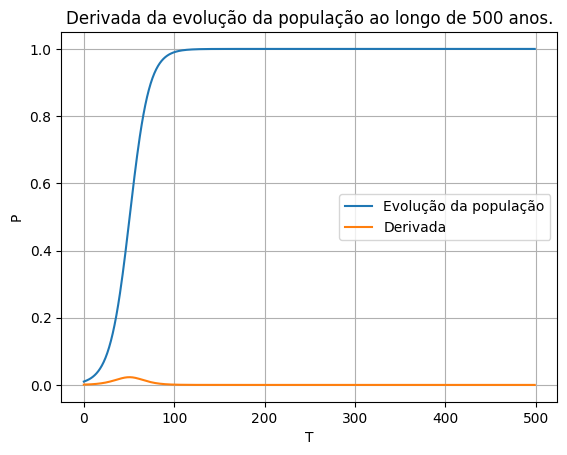

In [65]:
plt.title(f"Derivada da evolução da população ao longo de {T} anos.")
plt.plot(Ts, Ps, label = "Evolução da população")
plt.plot(Ts, np.append(forward_diff(Ps), 0.0), label = "Derivada")
plt.xlabel("T")
plt.ylabel("P")
plt.legend()
plt.grid()

Que, nesse caso, é o ponto $1$, equivalente à capacidade de suporte da população. Esse resultado poderia também ter sido encontrado analiticamente, resolvendo o modelo para a condição de que $P_{t+1} = P^*$:

$$P^* = P^* e^{r(1 - \frac{P^*}{K})}$$

Aqui, existem duas possibilidades:
* $P^* = 0$.
* $P^* \neq 0$

Como $P^* = 0$ é uma solução trivial, é interessante investigar a segunda possibilidade:

$$1 = e^{r(1 - \frac{P^*}{K})}$$

$$0 = r(1 - \frac{P^*}{K})$$

$$P^* = K$$

Para analisar a estabilidade local desses pontos, devemos verificar o valor da derivada da função nos mesmos, e avaliar se seu módulo é menor que 1:

$f'(P) = e^{r(1 - \frac{P}{K})} - P e^{r(1 - \frac{P}{K})} \frac{r}{K}$

Para $P = 0$:

$f'(0) = e^{r}$

Que é estável apenas se $|e^r| < 1$, ou seja, se $r < 0$.

Para $P = K = 1$:

$f'(1) = 1 - r$

Que é estável apenas se $|1 - r| < 1$, ou seja, se $0 < r < 2$.



### Beverton-Holt

O modelo de Beverton-Holt, introduzido em 1957, descreve a evolução de uma população $P$ ao longo do tempo como:

$$P_{t+1} = \frac{rP_t}{1 + \frac{P_t}{K}}$$

In [66]:
def beverton_holt(P_t, r, K):    
    return r*P_t/(1 + P_t/K)

Usando as mesmas condições iniciais anteriores, podemos investigar o comportamento desse modelo ao longo do tempo. Aqui, é importante esclarecer que o $r$, na verdade, não é a taxa de crescimento intrínsica usada anteriormente no modelo de Ricker, mas sim ela somada de 1.

In [67]:
P_0 = 0.01
r = 0.05
r = r + 1
K = 1
T = 500

Ps = np.zeros(T)
Ps[0] = P_0

Ts = np.arange(0, T, 1)

In [68]:
for t in range(T - 1):
    Ps[t + 1] = beverton_holt(Ps[t], r, K)

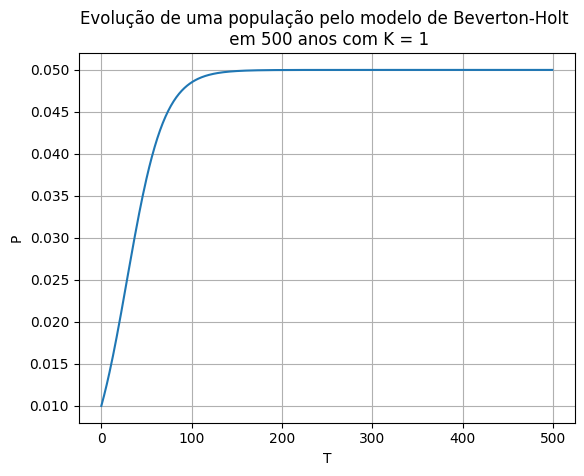

In [69]:
plt.title(f"Evolução de uma população pelo modelo de Beverton-Holt \n em {T} anos com K = {1}")
plt.plot(Ts, Ps)
plt.xlabel("T")
plt.ylabel("P")
plt.grid()

In [70]:
# Garantindo mesmo tamanho de Ps e dPs
dPs = np.append(forward_diff(Ps), 0.0) 
print(Ps[dPs == 0.0])

[0.05]


Consegue-se verificar, numericamente, que um dos pontos de estabilidade aqui é $P = 1 - r$.

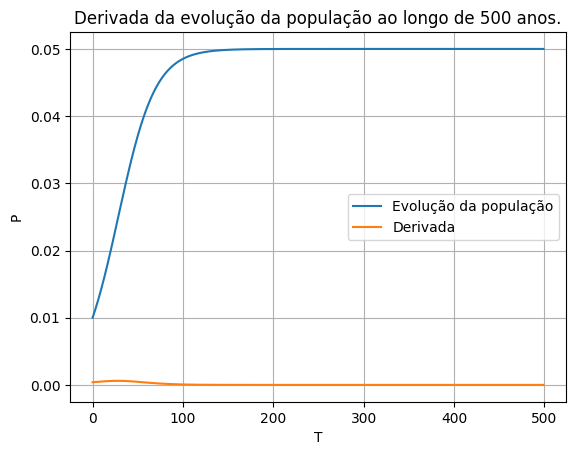

In [71]:
plt.title(f"Derivada da evolução da população ao longo de {T} anos.")
plt.plot(Ts, Ps, label = "Evolução da população")
plt.plot(Ts, np.append(forward_diff(Ps), 0.0), label = "Derivada")
plt.xlabel("T")
plt.ylabel("P")
plt.legend()
plt.grid()

Como no modelo de Ricker, isso poderia também ter sido verificado analiticamente:

$$P^* = \frac{rP^*}{1 + \frac{P^*}{K}}$$

Que também tem dois casos:

* $P^* = 0$
* $P^* \neq 0$

Para o segundo caso:

$$P^* = \frac{rP^*}{1 + \frac{P^*}{K}}$$

$$1 = \frac{r}{1 + \frac{P^*}{K}}$$

$$P^* = r - 1$$

Analisemos então, a estabilidade desses pontos, para a derivada:

$$f'(P) = r(\frac{1}{1 + \frac{P}{K}} - \frac{P}{K(1 + \frac{P}{K})^2})$$

Para $P = 0$:

$$f'(0) = r$$

Portanto, esse ponto será estável apenas se $|r| < 1$, ou seja, se $-1 < r < 1$.

Para $P = 1 - r$

$$f'(r - 1) = r(\frac{1}{1 + r - 1} - \frac{r - 1}{(1 + r - 1)^2})$$

$$f'(r - 1) = 1 - \frac{r - 1}{r}$$

$$f'(r - 1) = \frac{1}{r}$$

Portanto, apenas para valores de $|\frac{1}{r}| < 1$ esse ponto será estável, ou seja para $r > 1$ ou $r < -1$.


## 2. Construa o diagrama de órbita do modelo de Ricker (veja pg. 356 do Strogatz para o mapa logístico).

Para construir o diagrama de órbita, devemos, para cada $r$, no intervalo de $[0.0, 4.0]$, começar de algum valor de população inicial aleatório, e verificar, após $T$ interações, qual foi o valor final daquela evolução. Se fizermos isso para $N$ valores iniciais aleatórios no intervalo de $[0.0, 1.0)$, obteremos, enfim, o diagrama desejado, plotando o valor final $P_f$, para cada $r$.  

In [72]:
n_rands = 50
T = 1000


R = np.arange(0.0, 4.0, 0.001)

N = np.random.rand(n_rands)

Ps = np.zeros((R.shape[0], N.shape[0]))

for r in range(R.shape[0]):
    for n in range(n_rands):
        Pf = N[n]
        for t in range(T):
            Pf = ricker(Pf, R[r], 1)
        Ps[r, n] = Pf
        



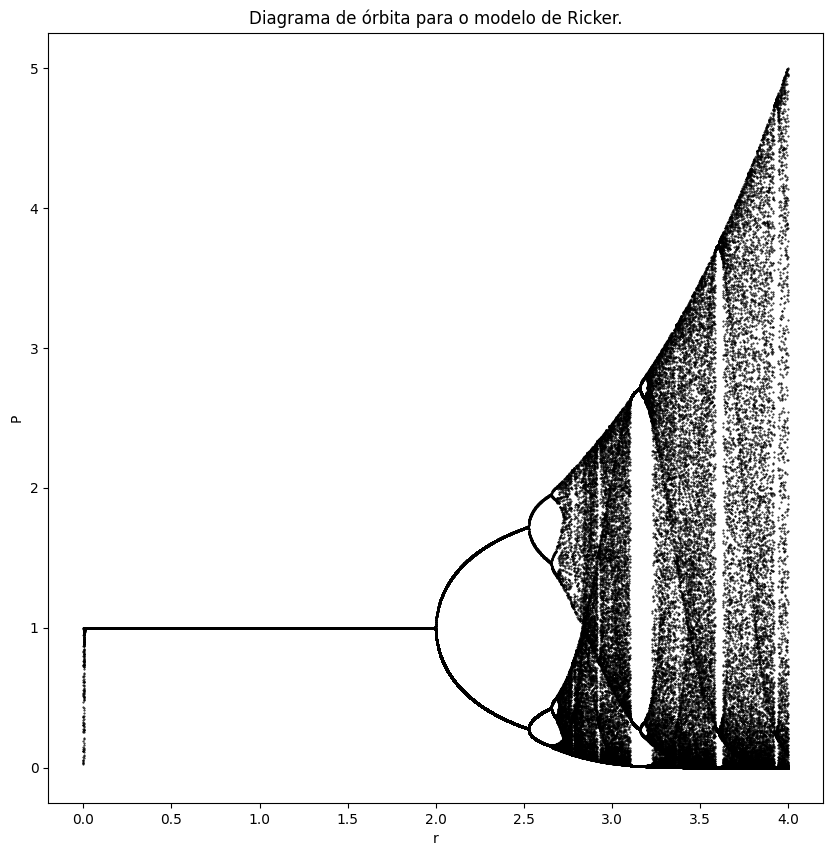

In [73]:
plt.figure(figsize = (10, 10))
plt.title("Diagrama de órbita para o modelo de Ricker.")
plt.xlabel("r")
plt.ylabel("P")
for i in range(n_rands):
    plt.scatter(R, Ps[:, i], 0.2, c = "black")


## 3. Calcule o expoente de Lyapunov do modelo de Ricker (veja exemplo 10.5.3 na pg. 368 do Strogatz para o mapa logístico) como função de r.

In [78]:
def dRicker(P_t, r):
    return np.exp(r*(1 - P_t))*(1 - r*P_t)

In [87]:
LyR = np.zeros(R.shape[0])
T = 1000
K = 1
P_0 = 0.1

Ts = np.arange(0, T, 1)

RickerPs = np.zeros(T)
dRickerPs = np.zeros(T)

for r in range(R.shape[0]):
    RickerPs = np.zeros(T)
    RickerPs[0] = P_0

    for t in range(T - 1):
        RickerPs[t + 1] = ricker(RickerPs[t], R[r], K)
        dRickerPs[t] = dRicker(RickerPs[t + 1], R[r])

    LyR[r] = np.sum(np.log(np.abs(dRickerPs[:-1])))

LyR = LyR/(T - 1)

C:\Users\Lampada\AppData\Local\Temp\ipykernel_24856\952446617.py:20: RuntimeWarning: divide by zero encountered in log
  LyR[r] = np.sum(np.log(np.abs(dRickerPs[:-1])))


[0.         0.00068286 0.00101175 ... 0.50928138 0.50985289 0.51274372]


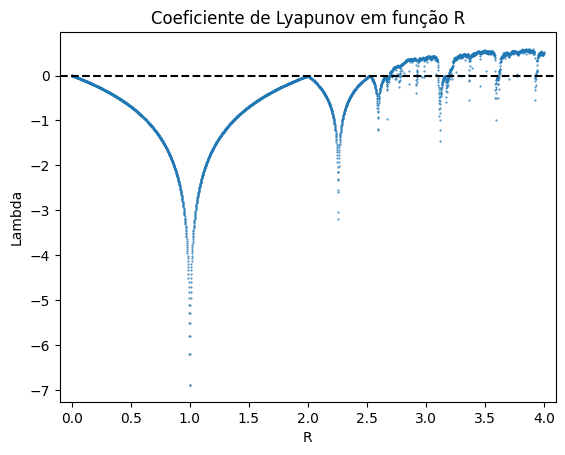

In [98]:
plt.scatter(R, LyR, 0.2)
plt.title("Expoente de Lyapunov em função R")
plt.xlabel("R")
plt.ylabel("Lambda")
plt.hlines(0.0, -0.1, 4.1, colors = "black", linestyles= "dashed")
plt.xlim(-0.1, 4.1)
print(LyR)

## 4. Calcule analiticamente o expoente de Lyapunov do modelo de Beverton-Holt como função de r.

Partindo do cálculo analítico do exponente de Lyapunov:

$$\lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i = 0}^{n - 1} ln|f'(x_i)|$$

E do modelo de Beverton-Holt:

$$P_{t+1} = \frac{rP_t}{1 + \frac{P_t}{K}}$$

Pode-se calcular analiticamente o expoente de Lyapunov com função de $r$. Aqui, é importante apontar um detalhe: No modelo de Beverton-Holt, é previsto que após um certo número de iterações, o modelo chega em um ponto fixo, que é caracterizado por:

$$P^* = f(P^*)$$

Ou seja, após um número específico de iterações, a função sempre irá possuir o mesmo valor, $P^*$. No cálculo do expoente, se tendermos $n$ ao infinito, é esperado que o cálculo do expoente se torne uma soma constante do mesmo valor, $ln|f'(P^*)|$, resultando em $tln|f'(P^*)|$, que ao ser dividido por $t$, resulta em:

$$\lambda = ln|f'(P^*)|$$


Portanto, para modelos que tendem a um ponto fixo, o cálculo do expoente se torna o cálculo do valor do $ln$ no ponto fixo. Para o modelo de Beverton-Holt, usando os pontos calculados no exercício 1:

Para o primeiro ponto $P^*_1 = 0$

$$P^*_1 = 0$$
$$f'(0) = r$$
$$\lambda_1 = ln|r|$$

Para o segundo ponto $P^*_2 = r - 1$

$$P^*_2 = r - 1$$
$$f'(r - 1) = \frac{1}{r}$$
$$\lambda_2 = -ln|r|$$